In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")

print("Movies:", movies.shape)
print("Ratings:", ratings.shape)
print("Tags:", tags.shape)
print("Links:", links.shape)


Movies: (9742, 3)
Ratings: (100836, 4)
Tags: (3683, 4)
Links: (9742, 3)


In [3]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
data = pd.merge(ratings, movies, on="movieId")
data.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [6]:
data = pd.merge(data, tags[['userId','movieId','tag']], 
                on=['userId','movieId'], how='left')

data.head()


,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN


In [7]:
data.isnull().sum()


userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          99201
dtype: int64

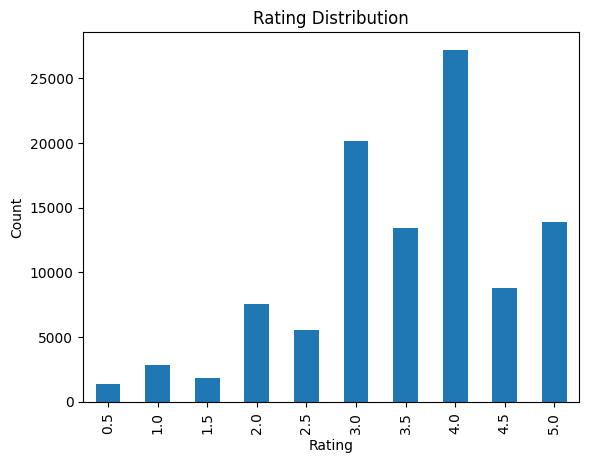

In [8]:
data['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()


In [9]:
top_movies = data['title'].value_counts().head(10)
top_movies


title
Pulp Fiction (1994)                          484
Forrest Gump (1994)                          335
Shawshank Redemption, The (1994)             319
Silence of the Lambs, The (1991)             283
Matrix, The (1999)                           280
Fight Club (1999)                            268
Star Wars: Episode IV - A New Hope (1977)    262
Braveheart (1995)                            245
Jurassic Park (1993)                         238
Terminator 2: Judgment Day (1991)            229
Name: count, dtype: int64

In [10]:
genres = data['genres'].str.split('|').explode()
genres.value_counts().head(10)


genres
Drama        43024
Comedy       39622
Action       31151
Thriller     27175
Adventure    24497
Romance      18353
Sci-Fi       17691
Crime        17224
Fantasy      11989
Children      9285
Name: count, dtype: int64

In [11]:
genre_rating = data.explode('genres').groupby('genres')['rating'].mean().sort_values(ascending=False)
genre_rating.head(10)


genres
Drama|Horror|Romance                    5.0
Fantasy|Mystery|Western                 5.0
Drama|Fantasy|Musical|Mystery|Sci-Fi    5.0
Comedy|Horror|Mystery                   5.0
Comedy|Crime|Fantasy                    5.0
Comedy|Drama|Fantasy|Mystery|Romance    5.0
Animation|Drama|Sci-Fi|IMAX             5.0
Animation|Drama|Fantasy|Mystery         5.0
Animation|Crime|Drama                   5.0
Comedy|Crime|Drama|Horror               5.0
Name: rating, dtype: float64

In [12]:
data['userId'].value_counts().describe()


count     610.000000
mean      168.322951
std       279.696027
min        20.000000
25%        35.000000
50%        71.500000
75%       168.000000
max      2796.000000
Name: count, dtype: float64

In [13]:
data.to_csv("merged_movielens.csv", index=False)
print("Merged file saved!")


Merged file saved!


In [14]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")

movies.shape, ratings.shape, tags.shape, links.shape


((9742, 3), (100836, 4), (3683, 4), (9742, 3))

In [15]:
data = pd.merge(ratings, movies, on="movieId")
data = pd.merge(data, tags[['userId','movieId','tag']], on=['userId','movieId'], how='left')
data.head()


,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN


<Axes: xlabel='rating'>

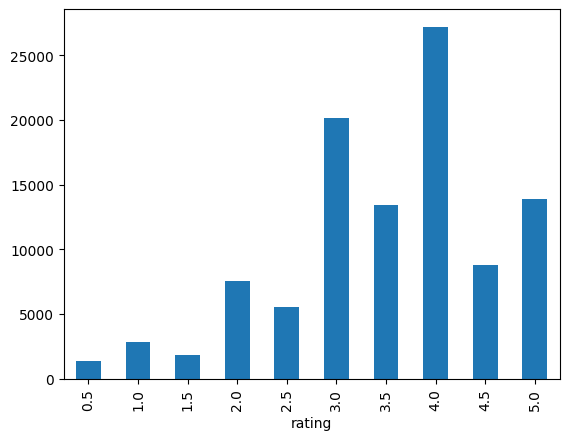

In [16]:
data['rating'].value_counts().sort_index().plot(kind='bar')


In [17]:
data['title'].value_counts().head(10)


title
Pulp Fiction (1994)                          484
Forrest Gump (1994)                          335
Shawshank Redemption, The (1994)             319
Silence of the Lambs, The (1991)             283
Matrix, The (1999)                           280
Fight Club (1999)                            268
Star Wars: Episode IV - A New Hope (1977)    262
Braveheart (1995)                            245
Jurassic Park (1993)                         238
Terminator 2: Judgment Day (1991)            229
Name: count, dtype: int64

In [18]:
data['genres'].str.split('|').explode().value_counts().head(10)


genres
Drama        43024
Comedy       39622
Action       31151
Thriller     27175
Adventure    24497
Romance      18353
Sci-Fi       17691
Crime        17224
Fantasy      11989
Children      9285
Name: count, dtype: int64

In [19]:
data.to_csv("final_dataset.csv", index=False)


Proposed Solution: Hybrid Movie Recommendation System


1.Collaborative Filtering (User–Movie Interactions)
Recommendations are generated based on similar users’ rating patterns.
Users who rate similar movies are grouped, and movies liked by similar users are recommended.

2.Content-Based Filtering (Movie Attributes)
Recommendations are based on movie genres and tags.
If a user likes action movies, other action movies are suggested.

3.Popularity-Aware Ranking
Movies with higher average ratings and more number of ratings are ranked higher to improve recommendation quality.

This hybrid approach combines user behavior and movie content, improving accuracy and reducing cold-start problem.